# Concrete Strength Prediction

The target is to predict continious numeric value for comressive strength of concreate as a function of several numerical inputs, such as age, cement, slad, ash, etc. 
The dataset is about 1000, and some variables are non-normally distributed. Applied Linear, Polynomial Regressions and several ensembly Tree/Forest Regressors, using cross-validation and grid, random searches for hyperparameter tuning.

`Attribute information:`

1.	Cement (cement); quantitative kg in a m3 mixture (Input Variable)
2.	Blast Furnace Slag (slag); quantitative	kg in a m3 mixture (Input Variable)
3.	Fly Ash (ash); quantitative	kg in a m3 mixture (Input Variable)
4.	Water(water); quantitative	kg in a m3 mixture (Input Variable)
5.	Superplasticizer (superplastic); quantitative kg in a m3 mixture (Input Variable)
6.	Coarse Aggregate (coarseagg); quantitative kg in a m3 mixture (Input Variable)
7.	Fine Aggregate (fineagg); quantitative	kg in a m3 mixture (Input Variable)
8.	Age (age); quantitative Day (1~365) (Input Variable)
9.	<b>Concrete compressive strength; quantitative MPa (Output Variable)</b>


## Steps:

 - Data loading and preprocessing
 - Exploratory Data Analysis, uni/bi-variate analysis
 - Feature Engineering
 - Model Selection and cross-validation
 - Model Tuning (grid and randomized searches)

# Data loading and preprocessing

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("concrete.csv")  # Read the data regarding dataset attributes
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
print(df.shape)

(1030, 9)


In [4]:
df.isna().sum()/len(df)*100 

cement          0.0
slag            0.0
ash             0.0
water           0.0
superplastic    0.0
coarseagg       0.0
fineagg         0.0
age             0.0
strength        0.0
dtype: float64

In [5]:
df.duplicated().sum()

25

In [6]:
print('Percent of duplicated entries is: ', df.duplicated().sum()/len(df)*100)

Percent of duplicated entries is:  2.4271844660194173


In [7]:
dupies=df[df.duplicated()]
dupies

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


`Considered as duplicated just because of one of values as the same as previous rows, when other values are different. So that not all of them are duplicated rows. Checking by target column only`

In [8]:
dupies.nunique()

cement           3
slag             3
ash              1
water            3
superplastic     3
coarseagg        3
fineagg          3
age              5
strength        11
dtype: int64

`Looks like 25-11 = 14 rows are duplicated, based on target column`

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [12]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

### Insights:

 - Data length is about 1000 entries, with 2.5% duplicates
 - Without NaN, negative or 'character' values, all are numeric (float or int)
 - Columns slag, ash, superplastic contain many zeros and non-normally distributed
 - age is skewed to the left
 - Output variable, strength, has the highest number of unique values

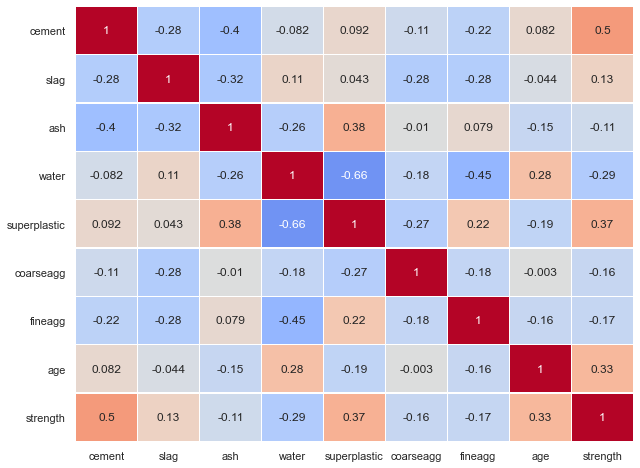

In [13]:
# Correlations heat map

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=0.5,
            center=0,
            cbar=False,
            cmap="coolwarm")
plt.show()

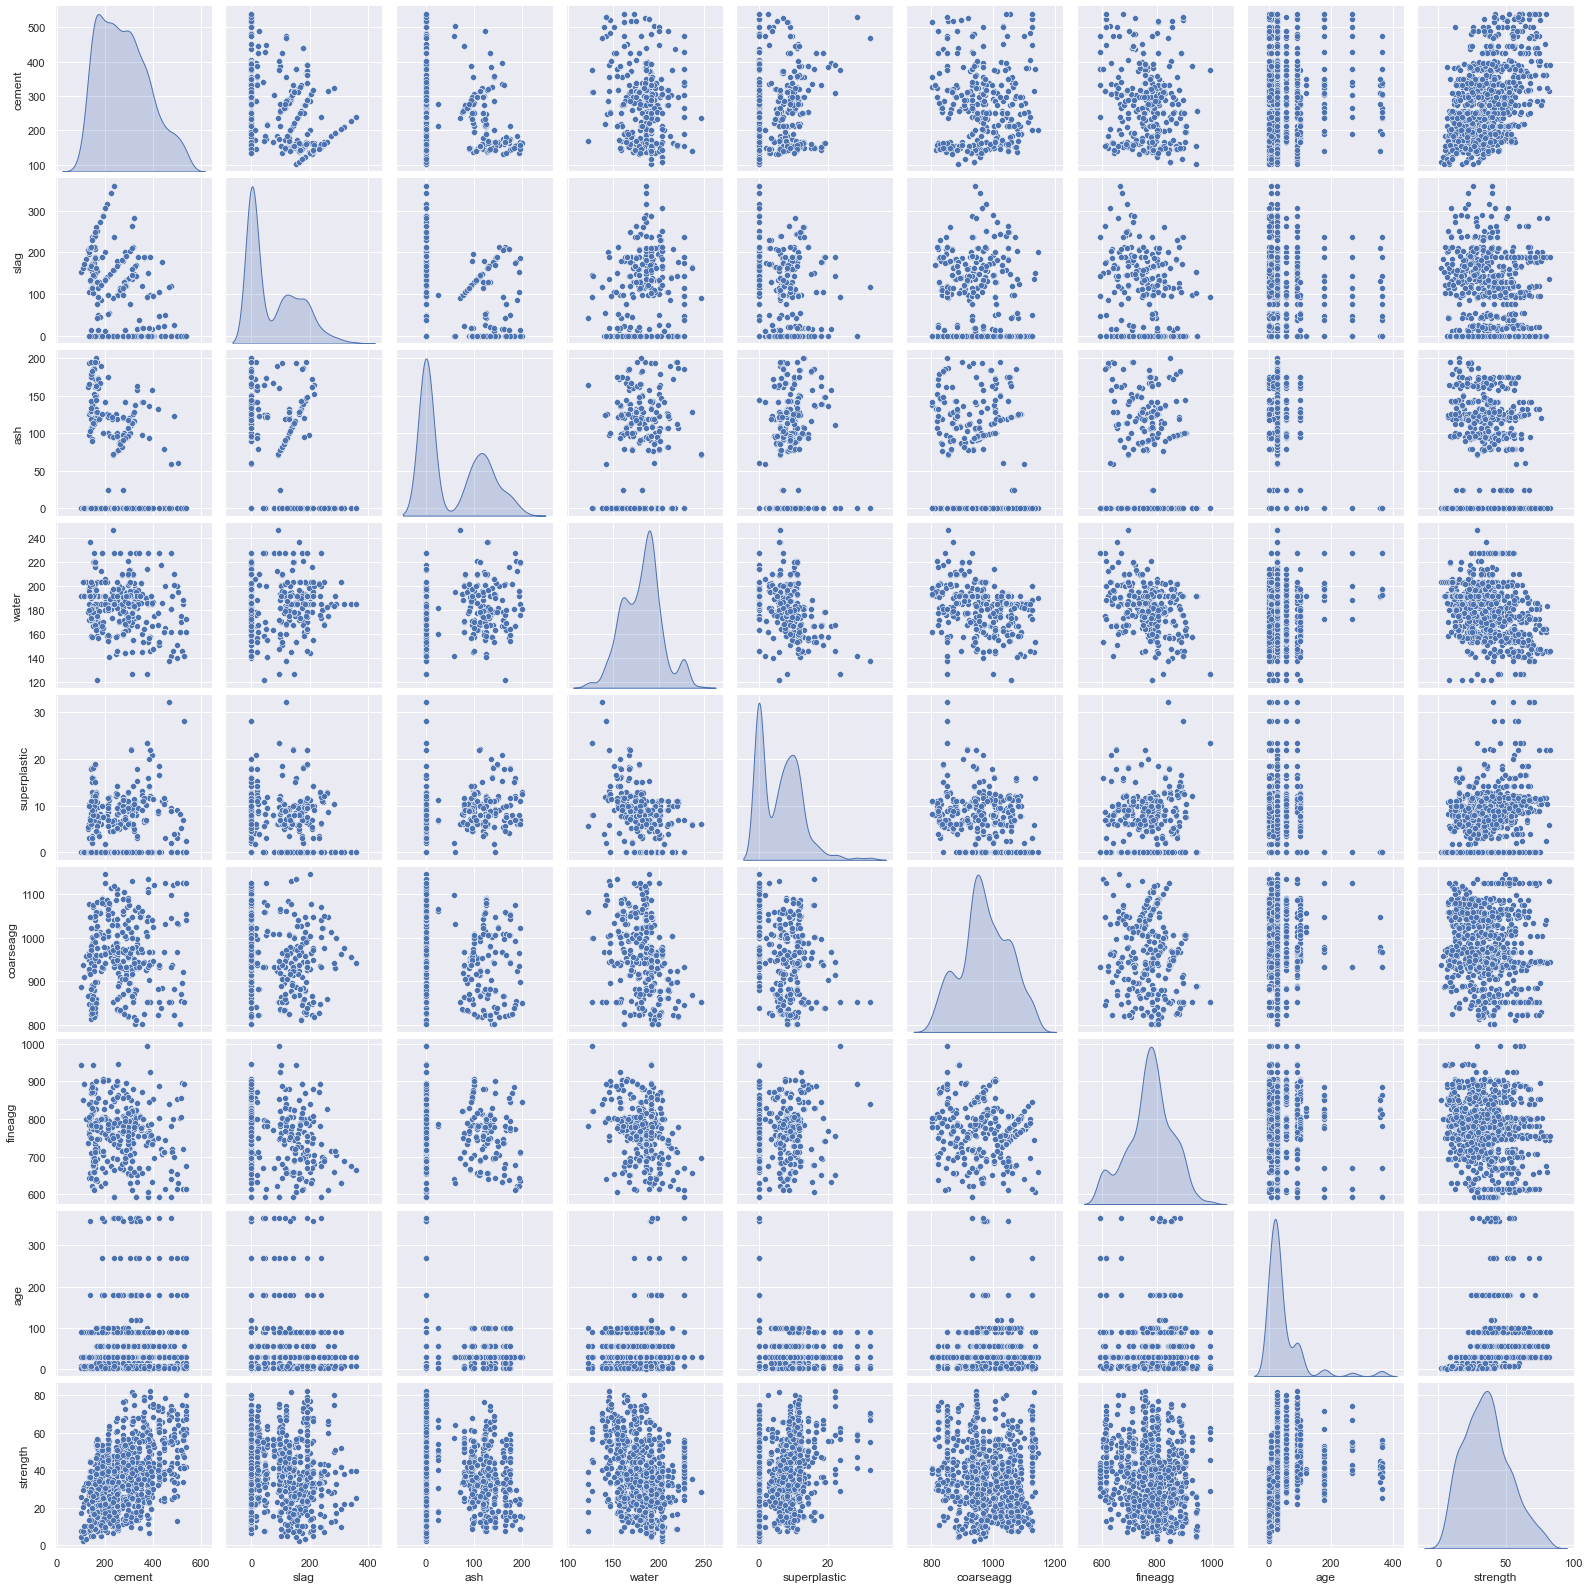

In [14]:
sns.pairplot(df, diag_kind='kde')

### Insights:

 - superplastic correlates with water with a negative factor of -0.66 (the highest value).
 - slag, ash and superplastic have many zero values and non-normally ditributed. These attributes should be 'engineered' in a way to allow good predictors scores. 
 - Strength (output variable) positevely correlates with cement, age and superplastic, negatively with water.

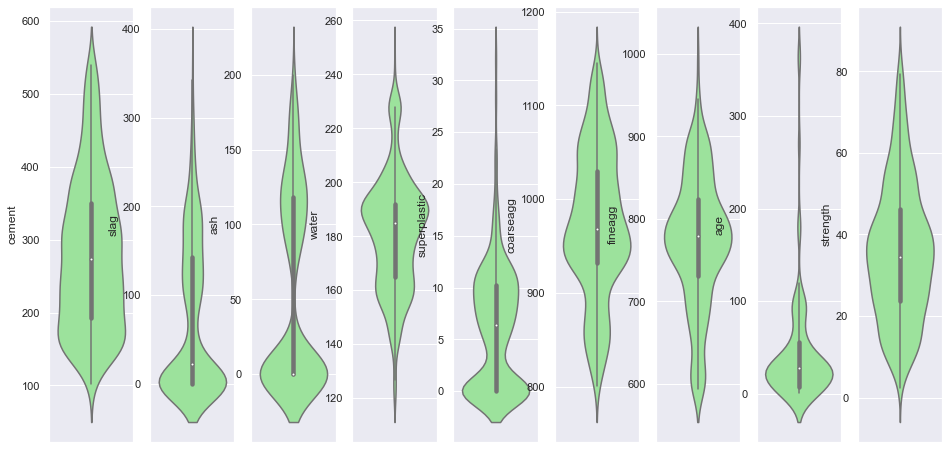

In [15]:
features=df.columns

fig, axs = plt.subplots(ncols = len(features), figsize = (16, 8))

for idx, field in enumerate(features):
    sns.violinplot(y = field, 
                data = df,
                ax = axs[idx], color='lightgreen')

### Insights:

 - cement, water, coarseagg, fineagg and strength look normally distributed, although water and strength have some outliers
 - slag, ash, superplastic are non-normally ditributed due to multiple zeros.
 - age should be log-transformed.

In [16]:
features_many_zeros=['slag', 'ash', 'superplastic']

for i in features_many_zeros:
    print(i)
    print(df[i].value_counts(normalize=True)[0])

slag
0.45728155339805826
ash
0.5495145631067961
superplastic
0.3679611650485437


`45, 55 and 37% zero values for slag, ash and superplastic respectively. This attributes need to be engineered or transformed.`

<AxesSubplot:xlabel='strength', ylabel='Count'>

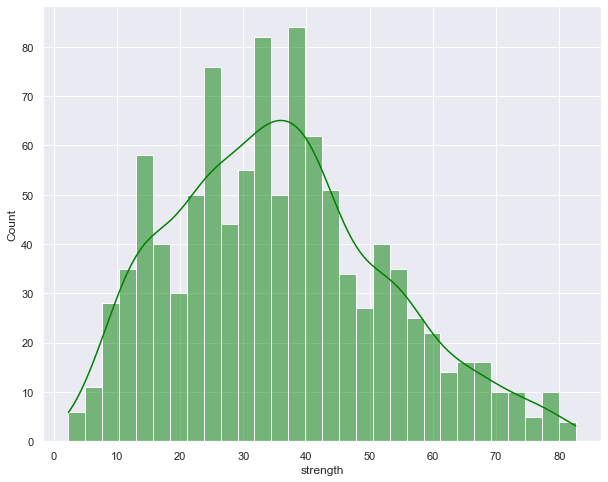

In [17]:
sns.histplot(df['strength'], kde=True, bins=30, color='green')

`Output variable, strength, is normally distributed.`

In [18]:
df['strength'].value_counts(normalize=True)*100

33.40    0.582524
79.30    0.388350
41.05    0.388350
71.30    0.388350
35.30    0.388350
           ...   
61.23    0.097087
26.31    0.097087
38.63    0.097087
47.74    0.097087
15.75    0.097087
Name: strength, Length: 845, dtype: float64

### Insights & Preprocessing Steps. 

 - since water and superplastic are correlating negatively, they can be engineered into 'stack' attributes with a certain relation (such as ratio, percent, sum, etc.)
 - slag and ash both having > 40% zeros, and can be also engineered into 'stack' attributes in attempt to mitigate non-normality.
 - age will be log transformed.

### EDA: Uni / Multivariate Analysis

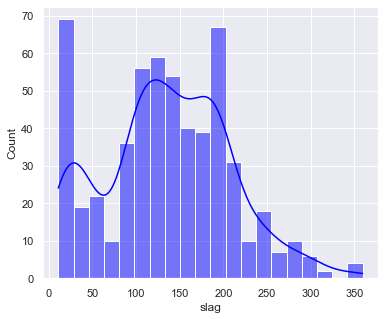

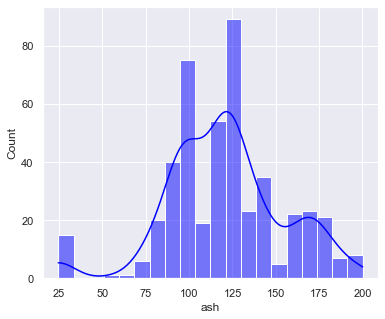

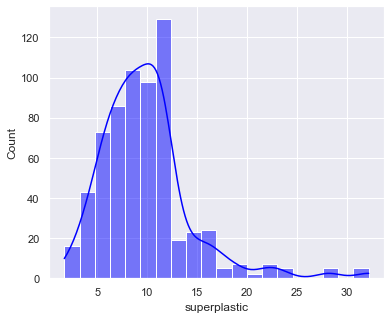

In [19]:
# Isolating highly skwed columns from "0" values to visualize distributions closely 

for i in features_many_zeros:
    
    list_no_zeros=df.loc[df[i] != 0, i]
    
    sns.set(rc={'figure.figsize':(6,5)})
    sns.histplot(list_no_zeros, kde=True, bins=20, color='blue')
    plt.show()

In [20]:
ash_no_zero=df.loc[df['ash'] != 0, 'ash']
slag_no_zero=df.loc[df['slag'] != 0, 'slag']

In [21]:
slag_ash_corr = slag_no_zero.corr(ash_no_zero)
slag_ash_corr

0.01847117264649214

### Insights:

- Isolation from zeros revealed almost normally distrubuted values in slag, ash and superplastic, which in total with zeros looks almost as double mixed ditributions. Linear Regression models can result in lower scores, where Tree / Forest regressors can be better approach.
- No correlation between slag and ash, when isolated from zeros.

### Feature Engineering

`Replacing multiple zeros by 1 (as non-significant vs. actual values) to allow divisions.`

In [22]:
df1 = df.replace(0, 1)
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,1.0,203.5,1.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,1.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,1.0,228.0,1.0,932.0,670.0,28,45.85
4,154.8,183.4,1.0,193.3,9.1,1047.4,696.7,28,18.29


### Approach:

 - Calculate slag percent vs total [slag + ash]
 - Calculate superplastic percent vs total [superplastic + water]
 - Calculate sum of 'solids' which is [slag + ash]
 - Calculate sum of superplastic and water which is [superplastic + water]

In [23]:
df1['slag_ash_perc'] = df1['slag']/(df1['ash']+df1['slag'])*100

df1['superplastic_water_perc'] = df1['superplastic']/(df1['water']+df1['superplastic'])*100

In [24]:
df1['sum_of_solids'] = df1['slag']+df1['ash']

df1['sum_water_sp'] = df1['superplastic']+df1['water']

In [25]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.000000,192.375000,272.900000,350.000000,540.000000
slag,1030.0,74.353107,85.887864,1.000000,1.000000,22.000000,142.950000,359.400000
ash,1030.0,54.737864,63.531503,1.000000,1.000000,1.000000,118.300000,200.100000
water,1030.0,181.567282,21.354219,121.800000,164.900000,185.000000,192.000000,247.000000
superplastic,1030.0,6.572621,5.599017,1.000000,1.000000,6.400000,10.200000,32.200000
coarseagg,1030.0,972.918932,77.753954,801.000000,932.000000,968.000000,1029.400000,1145.000000
fineagg,1030.0,773.580485,80.175980,594.000000,730.950000,779.500000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817961,16.705742,2.330000,23.710000,34.445000,46.135000,82.600000
slag_ash_perc,1030.0,52.305682,38.268831,0.497265,11.875000,50.000000,99.165275,99.722531


In [26]:
df2=df1.drop(['ash', 'slag', 'superplastic', 'water'], axis=1)

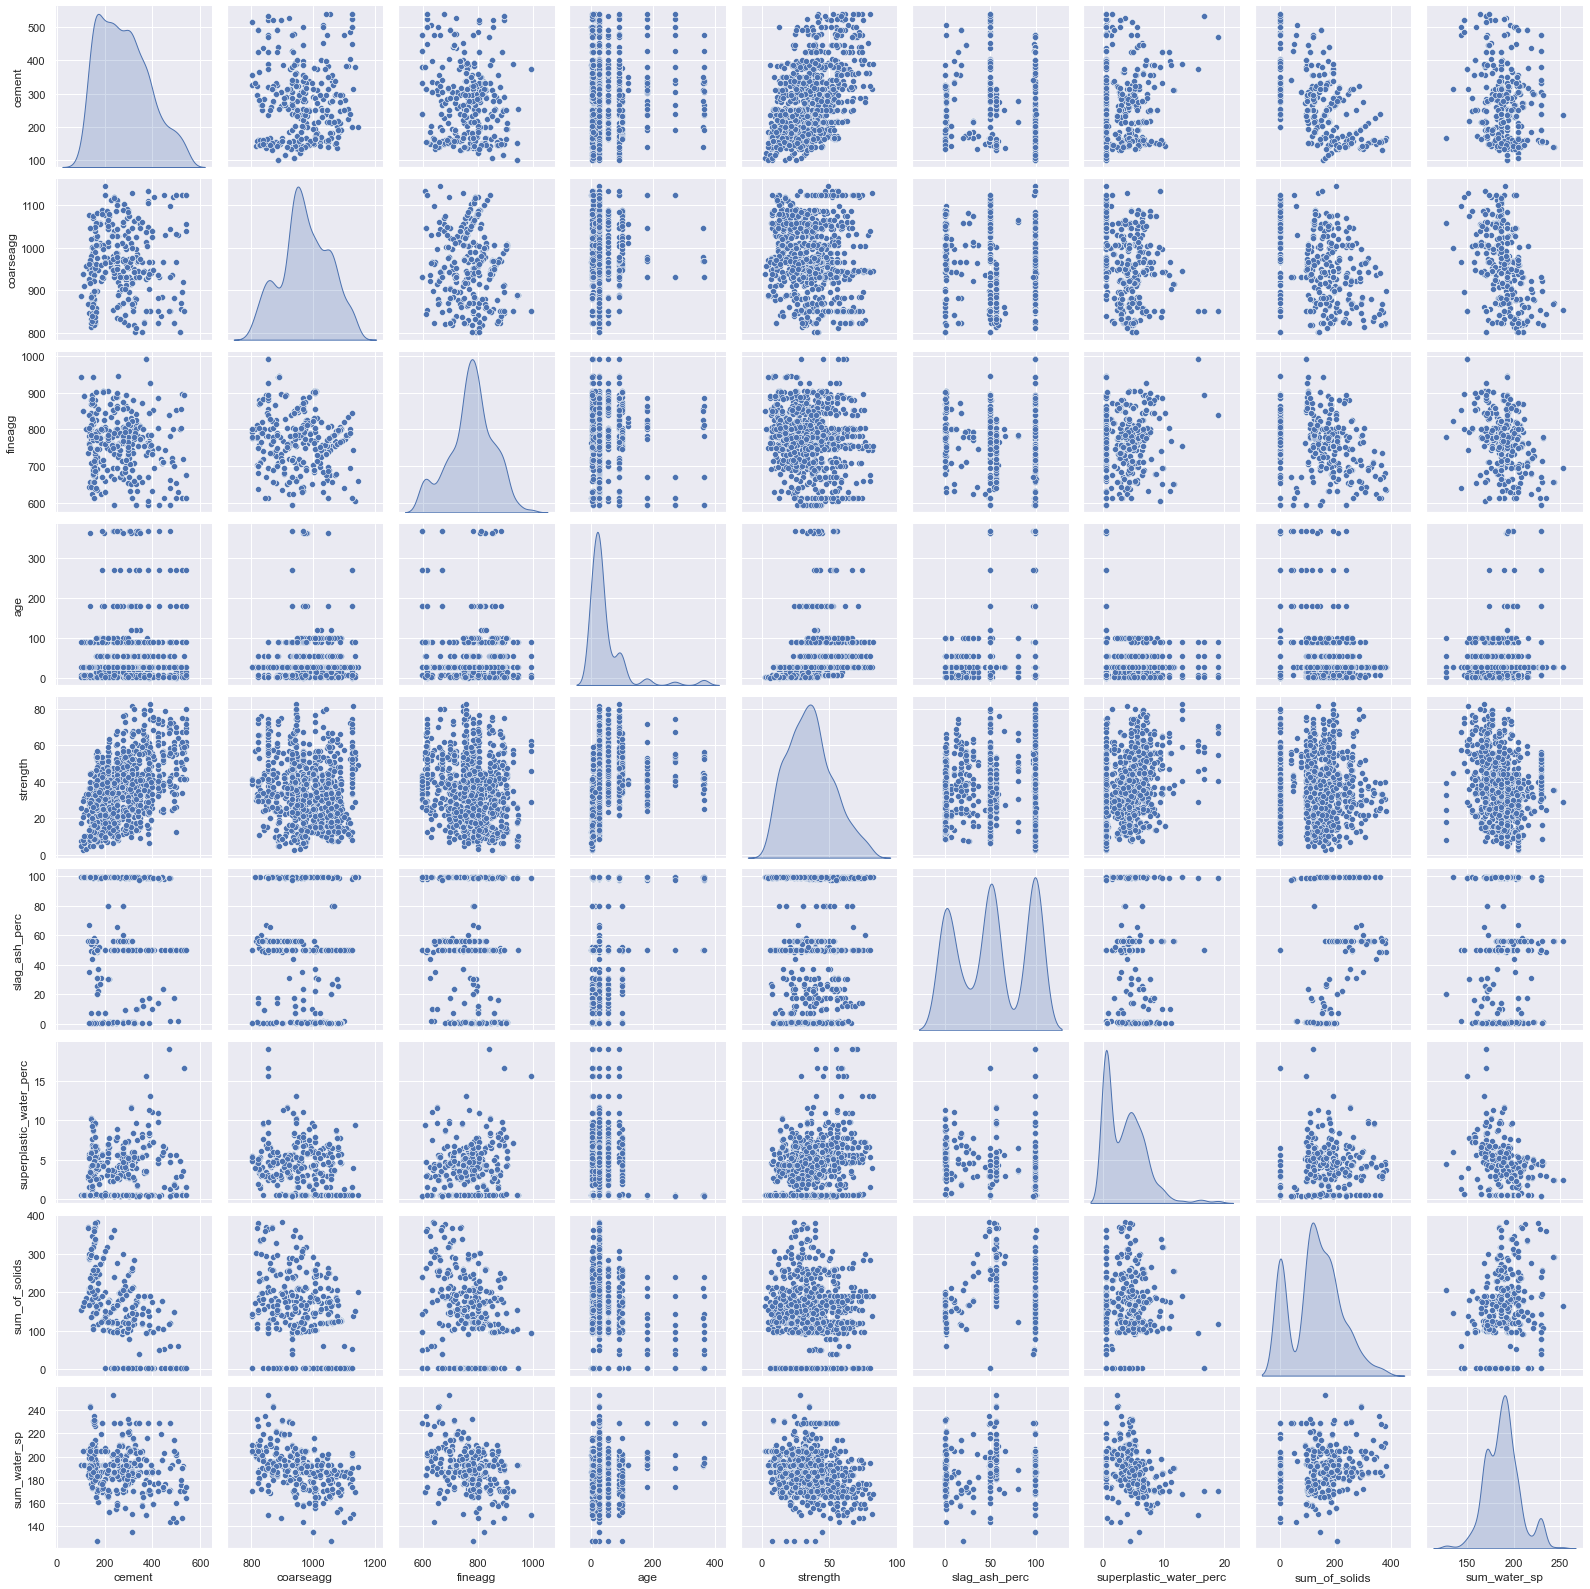

In [27]:
sns.pairplot(df2, diag_kind='kde')

### Insights:

 - 'slag_ash_perc' separated into three major distributions - it can be replaced by a categorical variable.
 - 'sum_water_sp' is almost normally distributed.
 - double ditributaion remained in 'sum_of_solids' and 'superplastic_water_perc'.

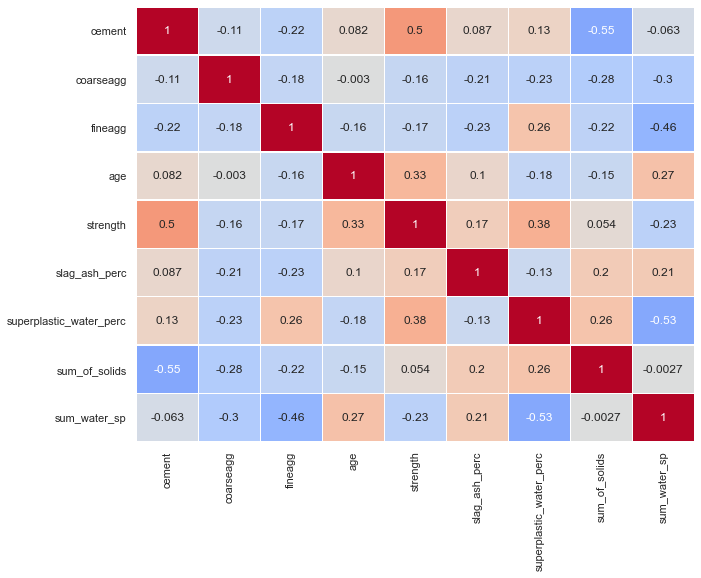

In [28]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df2.corr(),
            annot=True,
            linewidths=0.5,
            center=0,
            cbar=False,
            cmap="coolwarm")
plt.show()

### Insights:
 - Strongest correlations for the output variable, strength, with:
   - superplastic_water_perc
   - age
   - cement
 - Negative correlation with
   - sum_water_sp
   
`Overall correlation scores are similar, when there are no major strong correlations between the independent variables. Engineered features partially helped to mitigate the non-normality (conversion to categorical).`

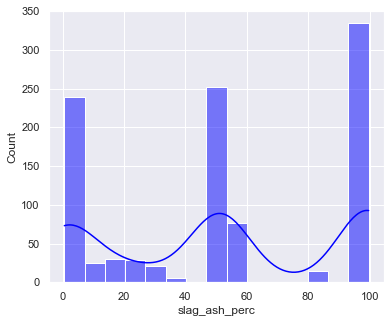

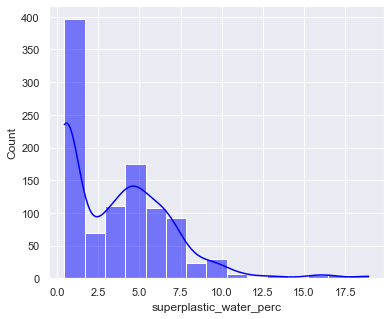

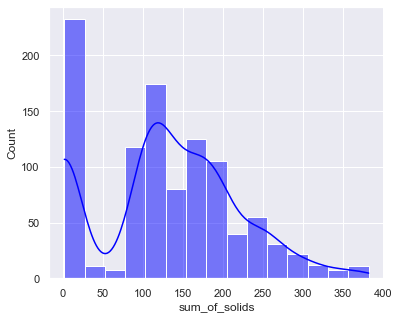

In [29]:
features=['slag_ash_perc', 'superplastic_water_perc', 'sum_of_solids']

for i in features:
    
    sns.set(rc={'figure.figsize':(6,5)})
    sns.histplot(df2[i], kde=True, bins=15, color='blue')
    plt.show()


 - 'slag_ash_percent' manual encoding into three major categories.

In [30]:
df3=df2.copy()

df3['slag_ash_cat']=""

df3.loc[(df3['slag_ash_perc']>=0) & (df3['slag_ash_perc']<40), 'slag_ash_cat']=1
df3.loc[(df3['slag_ash_perc']>=40) & (df3['slag_ash_perc']<80), 'slag_ash_cat']=2
df3.loc[(df3['slag_ash_perc']>=80), 'slag_ash_cat']=3

df3.head(3)

,cement,coarseagg,fineagg,age,strength,slag_ash_perc,superplastic_water_perc,sum_of_solids,sum_water_sp,slag_ash_cat
0,141.3,971.8,748.5,28,29.89,99.530516,0.488998,213.0,204.5,3
1,168.9,1080.8,796.2,14,23.51,25.345345,6.386753,166.5,169.1,1
2,250.0,956.9,861.2,28,29.22,1.034126,2.851218,96.7,192.9,1


In [31]:
df3['slag_ash_cat'].value_counts(normalize=True)*100

1    33.980583
3    33.398058
2    32.621359
Name: slag_ash_cat, dtype: float64

In [32]:
df3.drop(['slag_ash_perc'], axis=1, inplace=True)

In [33]:
df3['superplastic_water_perc'].value_counts(normalize=True)*100

0.518135    11.262136
0.436681     5.145631
0.535619     4.466019
0.488998     3.495146
0.534759     2.038835
              ...    
9.514170     0.097087
3.381643     0.097087
3.335018     0.097087
2.469136     0.097087
5.617978     0.097087
Name: superplastic_water_perc, Length: 305, dtype: float64

`'superplastic_water_perc' and 'sum_of_solids' were not converted into a categorical due to their almost 'normal' non-zeros distribution and values variety. Because of them it can be better to use Tree Regressors vs. Linear Regression.`

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cement                   1030 non-null   float64
 1   coarseagg                1030 non-null   float64
 2   fineagg                  1030 non-null   float64
 3   age                      1030 non-null   int64  
 4   strength                 1030 non-null   float64
 5   superplastic_water_perc  1030 non-null   float64
 6   sum_of_solids            1030 non-null   float64
 7   sum_water_sp             1030 non-null   float64
 8   slag_ash_cat             1030 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 72.5+ KB


`Coverting 'categories' into 'int' to allow visulaizations. It does not affects the models performance.`

In [35]:
for i in list(df3.columns[df3.dtypes=='object']): 
    
    df3[i]=df3[i].astype(int)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cement                   1030 non-null   float64
 1   coarseagg                1030 non-null   float64
 2   fineagg                  1030 non-null   float64
 3   age                      1030 non-null   int64  
 4   strength                 1030 non-null   float64
 5   superplastic_water_perc  1030 non-null   float64
 6   sum_of_solids            1030 non-null   float64
 7   sum_water_sp             1030 non-null   float64
 8   slag_ash_cat             1030 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 72.5 KB


`Log transform for 'age'.`

In [36]:
df4=df3.copy()

features_fl=['age']

for i in features_fl:
    df4[i+'_log']=np.log1p(df4[i])
    df4.drop(i, axis=1, inplace=True)


`Final correlation matrix.`

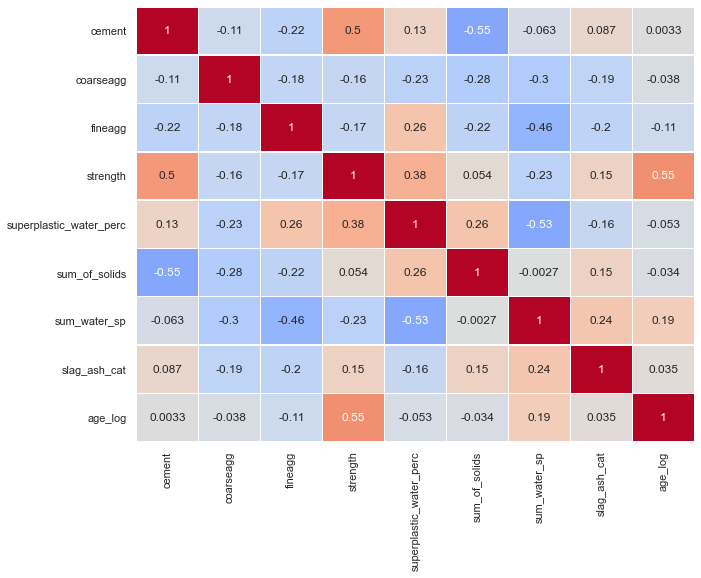

In [37]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df4.corr(),
            annot=True,
            linewidths=0.5,
            center=0,
            cbar=False,
            cmap="coolwarm")
plt.show()

`Visualization of feature distributions and outliers in the final dataset.` 

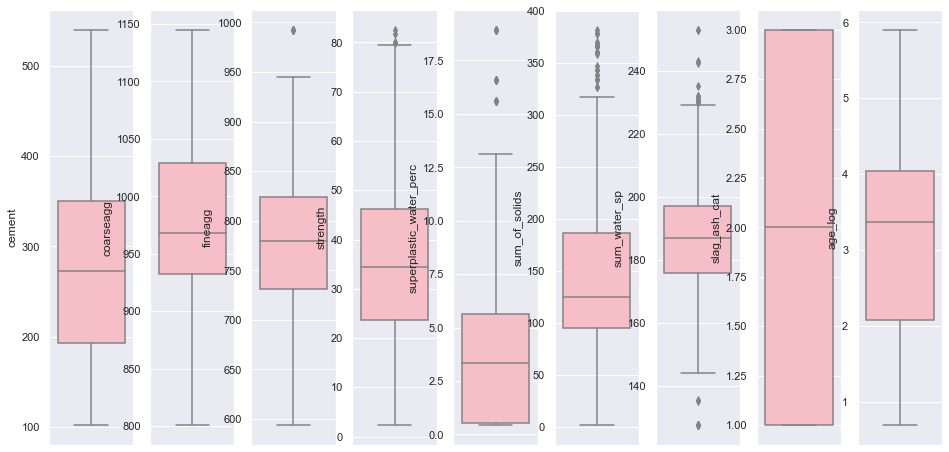

In [38]:
features = [col for col in df4.columns]

fig, axs = plt.subplots(ncols = len(features), figsize = (16, 8))

for idx, field in enumerate(features):
    sns.boxplot(y = field, 
                data = df4,
                ax = axs[idx], color='lightpink')

`Linear plots of the output variable as a function of variables that correlete with it the most.`

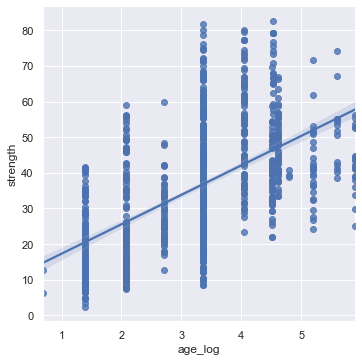

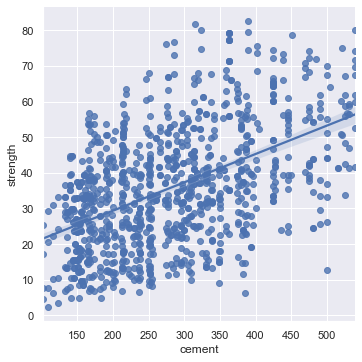

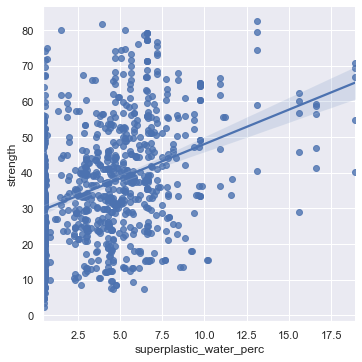

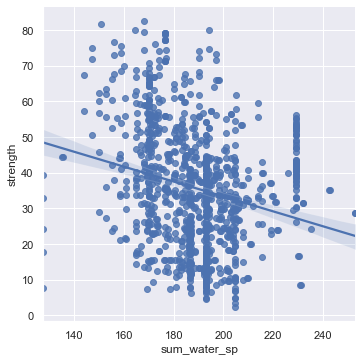

In [39]:
features_hcorr=['age_log', 'cement', 'superplastic_water_perc', 'sum_water_sp']

for i in features_hcorr: 
    
    sns.lmplot(y="strength", x=i, data=df4);
    plt.show()

In [40]:
Q1 = df4.quantile(q=0.25)
Q3 = df4.quantile(q=0.75)
IQR = Q3 - Q1
IQR

cement                     157.625000
coarseagg                   97.400000
fineagg                     93.050000
strength                    22.425000
superplastic_water_perc      5.109161
sum_of_solids               91.875000
sum_water_sp                21.475000
slag_ash_cat                 2.000000
age_log                      1.963610
dtype: float64

In [41]:
outliers = np.where((df4 < (Q1 - 1.5 * IQR)) | (df4 > (Q3 + 1.5 * IQR)))

print('% outliers in dataset is: ', round(len(outliers[0])/len(df4)*100, 1))

% outliers in dataset is:  6.0


### Insights:

 - Amount of outliers is only 6%. Not removing them because:
   - the dataset is relativelly small, so that it may bias the original data
   - it can decrease the model scores
   - there are non-normally distributed features in any case, so that Linear Regression likely is not the best option here, where Tree Regressors are not much sensitive to the outliers 

## Data Split and Scaling

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [44]:
X = df4.drop(columns= ['strength'])  # Separating the target and the rest
y = df4.strength

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 177788)

In [46]:
print(X_train.shape, y_train.shape)

(772, 8) (772,)


In [47]:
y_train1 = y_train.values.reshape(-1,1)
y_test1 = y_test.values.reshape(-1,1)

y_train1.shape

(772, 1)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train1)

In [50]:
X_train_scaled = X_scaler.transform(X_train)
y_train_scaled = y_scaler.transform(y_train1)

In [51]:
X_test_scaled = X_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(y_test1)

In [52]:
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y.values.reshape(-1,1))

## Linear Regression

In [53]:
# List to collect resulting models and their scores

models =[]
best_scores = []
cv_scores = []

In [54]:
reg = LinearRegression(n_jobs=10)

In [55]:
reg_model=reg.fit(X_train_scaled, y_train_scaled)

In [56]:
y_pred_lr = reg_model.predict(X_test_scaled)

print('Training score: ', reg_model.score(X_train_scaled, y_train_scaled))
print('Testing score: ', reg_model.score(X_test_scaled, y_test_scaled))


Training score:  0.8133677793647309
Testing score:  0.8164756563086422


In [57]:
models.append('Linear_Regression')
best_scores.append(reg_model.score(X_test_scaled, y_test_scaled))
best_scores

[0.8164756563086422]

In [58]:
mean_absolute_error(y_test_scaled, y_pred_lr)

0.06810597188589623

In [59]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, round(reg_model.coef_[0][idx], 2)))

The coefficient for cement is 0.76
The coefficient for coarseagg is 0.13
The coefficient for fineagg is 0.18
The coefficient for superplastic_water_perc is 0.09
The coefficient for sum_of_solids is 0.54
The coefficient for sum_water_sp is -0.21
The coefficient for slag_ash_cat is 0.03
The coefficient for age_log is 0.59


## Lasso

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso = Lasso(alpha=0.001, random_state=28)
lasso.fit(X_train_scaled, y_train_scaled)

print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.58179297  0.          0.          0.11442924  0.34611924 -0.3300768
  0.03098138  0.55518209]


In [62]:
print('Training score: ', lasso.score(X_train_scaled, y_train_scaled))
print('Testing score: ', lasso.score(X_test_scaled, y_test_scaled))

Training score:  0.8048955268975055
Testing score:  0.8121947049008944


In [63]:
models.append('Lasso')
best_scores.append(lasso.score(X_test_scaled, y_test_scaled))
best_scores

[0.8164756563086422, 0.8121947049008944]

## Ridge

In [64]:
from sklearn.linear_model import Ridge

In [65]:
ridge = Ridge(alpha=0.1, max_iter=100, random_state=28)
ridge.fit(X_train_scaled,y_train_scaled)

print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.74056288  0.11174486  0.16110874  0.0913626   0.51959262 -0.22867712
   0.03091315  0.58785457]]


In [66]:
print('Training score: ', ridge.score(X_train_scaled, y_train_scaled))
print('Testing score: ', ridge.score(X_test_scaled, y_test_scaled))

Training score:  0.8132773769385282
Testing score:  0.8168754107790782


In [67]:
models.append('Ridge')
best_scores.append(ridge.score(X_test_scaled, y_test_scaled))

In [68]:
best_scores

[0.8164756563086422, 0.8121947049008944, 0.8168754107790782]

## Polynomial model, degree 3

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(X_train_scaled)
X_test2 = poly.fit_transform(X_test_scaled)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)


In [71]:
print('Training score: ', poly_clf.score(X_train2, y_train))
print('Testing score: ', poly_clf.score(X_test2, y_test))

Training score:  0.9102690977169708
Testing score:  0.876800564799376


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [73]:
cv_score_poly = cross_val_score(poly_clf, X_scaled, y_scaled, cv=10).mean()
print('cross-validation test score: ', cv_score_poly)

cross-validation test score:  0.8041032951255074


In [74]:
cv_score_ridge = cross_val_score(ridge, X_scaled, y_scaled, cv=10).mean()
cv_score_lasso = cross_val_score(lasso, X_scaled, y_scaled, cv=10).mean()
cv_score_lr = cross_val_score(reg_model, X_scaled, y_scaled, cv=10).mean()

print(cv_score_lr, cv_score_lasso, cv_score_ridge)

0.8041032951255074 0.7970809929420675 0.8040846529979133


In [75]:
models.append('Poly_3')
best_scores.append(poly_clf.score(X_test2, y_test))

In [76]:
ft=[cv_score_lr, cv_score_lasso, cv_score_ridge, cv_score_poly]

for i in ft:
    cv_scores.append(i)

In [77]:
print('Rergession models', models)   
print('Rergession models best scores', best_scores)
print('Rergession models cv scores', cv_scores)

Rergession models ['Linear_Regression', 'Lasso', 'Ridge', 'Poly_3']
Rergession models best scores [0.8164756563086422, 0.8121947049008944, 0.8168754107790782, 0.876800564799376]
Rergession models cv scores [0.8041032951255074, 0.7970809929420675, 0.8040846529979133, 0.8041032951255074]


### Decision Tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
regressor = DecisionTreeRegressor(random_state=245)

In [80]:
regressor_model = regressor.fit(X_train_scaled, y_train_scaled)
y_pred = regressor_model.predict(X_test_scaled)

In [81]:
print('Training score: ', regressor_model.score(X_train_scaled, y_train_scaled))
print('Testing score: ', regressor_model.score(X_test_scaled, y_test_scaled))

Training score:  0.9996050018666811
Testing score:  0.7693341804189384


 `This model is overfit: need to perform parameters tuning (Grid/Random Search).`

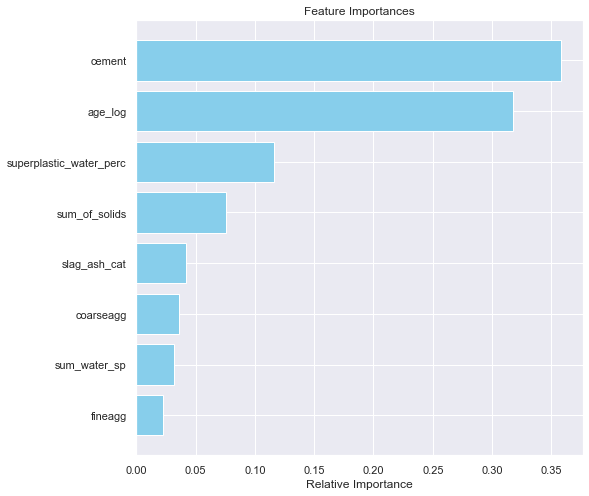

In [82]:
# Feature Importance
features=[col for col in X.columns]

importances = regressor_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights:

 - The most significant features are cement, age_log and 'superplastic_water_perc', which reflects the highest correlations with the output variable on the correlation matrix.

In [83]:
num_folds = 10
seed = 15

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

results = cross_val_score(poly_clf, X_scaled, y_scaled, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.79002957 0.75148401 0.76719093 0.79785957 0.86107693 0.7616045
 0.89752722 0.83022285 0.8027744  0.7941579 ]
Accuracy: 80.539% (4.349%)


In [84]:
results_regr = cross_val_score(regressor_model, X_scaled, y_scaled, cv=kfold)
print(results_regr)
print("Accuracy: %.3f%% (%.3f%%)" % (results_regr.mean()*100.0, results_regr.std()*100.0))

[0.90705405 0.86194952 0.8781673  0.75066004 0.86923131 0.75879836
 0.88467791 0.86979348 0.88882291 0.86065267]
Accuracy: 85.298% (5.087%)


### Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

In [86]:
rf=RandomForestRegressor(random_state=447)

In [87]:
rf_model=rf.fit(X_train_scaled, y_train_scaled.ravel())

y_pred=rf_model.predict(X_test_scaled)

In [88]:
print('Training score: ', rf_model.score(X_train_scaled, y_train_scaled.ravel()))
print('Testing score: ', rf_model.score(X_test_scaled, y_test_scaled.ravel()))

Training score:  0.986129296420195
Testing score:  0.9143877103136979


In [89]:
cv_rf=cross_val_score(rf_model, X_scaled, y_scaled.ravel(), cv=10).mean()
cv_rf

0.9161144809122506

In [90]:
models.append('Random_Forest')

In [91]:
best_scores.append(rf_model.score(X_test_scaled, y_test_scaled.ravel()))

In [92]:
cv_scores.append(cv_rf)

In [93]:
print('models', models)   
print('best scores', best_scores)
print('cv scores', cv_scores)

models ['Linear_Regression', 'Lasso', 'Ridge', 'Poly_3', 'Random_Forest']
best scores [0.8164756563086422, 0.8121947049008944, 0.8168754107790782, 0.876800564799376, 0.9143877103136979]
cv scores [0.8041032951255074, 0.7970809929420675, 0.8040846529979133, 0.8041032951255074, 0.9161144809122506]


### Bagging Regressor

In [94]:
br=BaggingRegressor(random_state=447)

In [95]:
br_model=br.fit(X_train_scaled, y_train_scaled.ravel())
y_pred=br_model.predict(X_test_scaled)

In [96]:
print('Training score: ', br_model.score(X_train_scaled, y_train_scaled.ravel()))
print('Testing score: ', br_model.score(X_test_scaled, y_test_scaled.ravel()))

Training score:  0.9815631686012317
Testing score:  0.8988172343307453


In [97]:
cv_br=cross_val_score(br_model, X_scaled, y_scaled.ravel(), cv=10).mean()
cv_br

0.9034761013064246

In [98]:
models.append('Bagging_Regressor')

In [99]:
best_scores.append(br_model.score(X_test_scaled, y_test_scaled.ravel()))

In [100]:
cv_scores.append(cv_br)

### GradientBoostRegressor

In [101]:
gbr=GradientBoostingRegressor(random_state=447)

In [102]:
gbr_model=gbr.fit(X_train_scaled, y_train_scaled.ravel())

y_pred=gbr_model.predict(X_test_scaled)

In [103]:
print('Training score: ', gbr_model.score(X_train_scaled, y_train_scaled.ravel()))
print('Testing score: ', gbr_model.score(X_test_scaled, y_test_scaled.ravel()))

Training score:  0.9532489382128001
Testing score:  0.9152232672212315


In [104]:
cross_val_score(gbr_model, X_scaled, y_scaled.ravel(), cv=10).mean()

0.9074945745180066

`This is the highest test and cross-validation scores, so that this model will be tuned with Grid or Randomized search later on.`

### Tuning

 - Trying to tune the overfit TreeRegressor

In [105]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [106]:
regressor_model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

#### Grid Search

In [107]:
params={
    'criterion':['mse', 'mae', 'friedman_mse'],
    'max_depth':[5, 10, 15, 20],
    'min_impurity_decrease':[0.002, 0.005],
    'max_features':["auto", "sqrt", "log2"],
    'min_samples_leaf':[1, 2, 5],
    'splitter':['best', 'random']
    
}

In [108]:
grid=GridSearchCV(regressor, params, cv=5)

grid.fit(X_train_scaled, y_train_scaled.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=245),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.002, 0.005],
                         'min_samples_leaf': [1, 2, 5],
                         'splitter': ['best', 'random']})

In [109]:
print(grid.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 15, 'max_features': 'auto', 'min_impurity_decrease': 0.002, 'min_samples_leaf': 1, 'splitter': 'random'}


In [110]:
y_pred_grid=grid.predict(X_test_scaled)

In [111]:
print('Training score: ', grid.score(X_train_scaled, y_train_scaled.ravel()))
print('Testing score: ', grid.score(X_test_scaled, y_test_scaled.ravel()))

Training score:  0.9906412538840774
Testing score:  0.8464780176581507


In [112]:
regressor_gs = DecisionTreeRegressor(random_state=245, 
                                criterion='friedman_mse', 
                                max_depth=15, 
                                max_features='auto', 
                                min_impurity_decrease=0.002, 
                                min_samples_leaf=1, 
                                splitter='random')

In [113]:
regressor_model_gs = regressor_gs.fit(X_train_scaled, y_train_scaled)
y_pred = regressor_model_gs.predict(X_test_scaled)

In [114]:
print('Training score: ', regressor_model_gs.score(X_train_scaled, y_train_scaled))
print('Testing score: ', regressor_model_gs.score(X_test_scaled, y_test_scaled))

Training score:  0.9906412538840774
Testing score:  0.8464780176581507


In [115]:
num_folds = 10
seed = 15

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

results = cross_val_score(regressor_model_gs, X_scaled, y_scaled, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.82515918 0.81853039 0.80689651 0.88144129 0.84736562 0.77465333
 0.89927103 0.86496482 0.90804304 0.84337202]
Accuracy: 84.697% (4.014%)


In [116]:
cv_dtr=cross_val_score(regressor_model_gs, X_scaled, y_scaled, cv=10).mean()
cv_dtr

0.8612875556710439

#### Random Search

In [117]:
param_dist = {'criterion':['mse', 'mae', 'friedman_mse'],
            'splitter':['best', 'random'],
            "max_depth": sp_randint(3, 30),
            "max_features": sp_randint(1, 9),
            "min_samples_leaf": sp_randint(1, 11),
            'max_leaf_nodes':sp_randint(10, 101),
             }

In [118]:
# run randomized search
samples = 1000  # number of random samples 

randomCV = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=samples)

In [124]:
randomCV.fit(X_train_scaled, y_train_scaled)

 
print(randomCV.best_params_)

{'criterion': 'mse', 'max_depth': 19, 'max_features': 7, 'max_leaf_nodes': 98, 'min_samples_leaf': 3, 'splitter': 'best'}


In [125]:
y_pred_randomcv=randomCV.predict(X_test_scaled)

print('Training score: ', randomCV.score(X_train_scaled, y_train_scaled))
print('Testing score: ', randomCV.score(X_test_scaled, y_test_scaled))

Training score:  0.9370800782854293
Testing score:  0.8282425815569576


In [126]:
regressor_rs = DecisionTreeRegressor(random_state=245, 
                                criterion='friedman_mse', 
                                max_depth=12, 
                                max_features=7, 
                                max_leaf_nodes=81, 
                                min_samples_leaf=3, 
                                splitter='best')

In [127]:
regressor_model_rs = regressor_rs.fit(X_train_scaled, y_train_scaled)
y_pred = regressor_model_rs.predict(X_test_scaled)

In [128]:
print('Training score: ', regressor_model_rs.score(X_train_scaled, y_train_scaled))
print('Testing score: ', regressor_model_rs.score(X_test_scaled, y_test_scaled))

Training score:  0.924412021492026
Testing score:  0.8236505566605002


In [129]:
cv_dt_rs=cross_val_score(regressor_model_rs, X_scaled, y_scaled, cv=10).mean()
cv_dt_rs

0.8240006186329556

`Grid search resulted in better cross-validation score, so that using it's scores for the record.`

In [130]:
models.append('DecisionTree_Regressor')

In [131]:
best_scores.append(regressor_model_gs.score(X_test_scaled, y_test_scaled))

In [132]:
cv_scores.append(cv_dtr)

### Insights:

 - GradientBoostingRegressor resulted in the highest score and cv-score. Performing Randomized Search on this model for the hyperparameters tuning. (GridSearch takes too long time with this algorithm, and also less efficient).

In [133]:
gbr_model.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [138]:
learning_rate=[float(x) for x in np.linspace(0.1, 1, num=10)]
learning_rate

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [139]:
param_dist = {'criterion':['mse', 'mae', 'friedman_mse'],
            'learning_rate':learning_rate,
            'warm_start':[False, True],
            "max_depth": sp_randint(3, 30),
            "max_features": sp_randint(1, 9),
            "min_samples_leaf": sp_randint(1, 11),
            'max_leaf_nodes':sp_randint(10, 101),
            'n_estimators':sp_randint(20, 501)
             }

In [140]:
# run randomized search
samples = 50  # number of random samples 

randomCV = RandomizedSearchCV(gbr, param_distributions=param_dist, n_iter=samples, cv=10)

In [141]:
randomCV.fit(X_train_scaled, y_train_scaled.ravel())

 
print(randomCV.best_params_)


{'criterion': 'mse', 'learning_rate': 0.2, 'max_depth': 8, 'max_features': 4, 'max_leaf_nodes': 98, 'min_samples_leaf': 9, 'n_estimators': 105, 'warm_start': False}


In [142]:
y_pred_randomcv=randomCV.predict(X_test_scaled)

print('Training score: ', randomCV.score(X_train_scaled, y_train_scaled.ravel()))
print('Testing score: ', randomCV.score(X_test_scaled, y_test_scaled.ravel()))


Training score:  0.9944120714475679
Testing score:  0.9355847158734998


In [143]:
gbr_rs=GradientBoostingRegressor(random_state=447,
                            criterion='mse',
                            learning_rate=0.1,
                            max_depth=16,
                            max_features=5, 
                            max_leaf_nodes=24, 
                            min_samples_leaf=4, 
                            n_estimators=366, 
                            warm_start=True)


In [144]:
gbr_rs_model=gbr_rs.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_gbr=gbr_rs_model.predict(X_test_scaled)


In [145]:
print('Training score: ', gbr_rs_model.score(X_train_scaled, y_train_scaled.ravel()))
print('Testing score: ', gbr_rs_model.score(X_test_scaled, y_test_scaled.ravel()))


Training score:  0.998156641890593
Testing score:  0.941923854690746


In [146]:
num_folds = 10
seed = 15

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

results = cross_val_score(gbr_rs_model, X_scaled, y_scaled.ravel(), cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.95976057 0.95194293 0.93649777 0.95047289 0.91630764 0.89250617
 0.96142402 0.95944146 0.96792474 0.9574366 ]
Accuracy: 94.537% (2.259%)


In [147]:
models.append('GradientBoosting_Regressor')


In [148]:
best_scores.append(gbr_rs_model.score(X_test_scaled, y_test_scaled.ravel()))


In [149]:
cv_scores.append(results.mean())


### Visualization of the best model feature importances

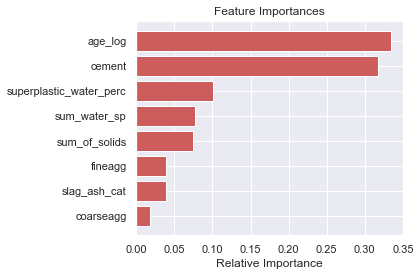

In [184]:
# Feature Importance
features=[col for col in X.columns]

importances = gbr_rs_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='indianred', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.tight_layout()
plt.savefig("output/final_model_features_importance.png")
plt.show()


In [178]:
predicted_unscaled_test=y_scaler.inverse_transform(y_pred_gbr.reshape(-1,1))
#predicted_unscaled_test

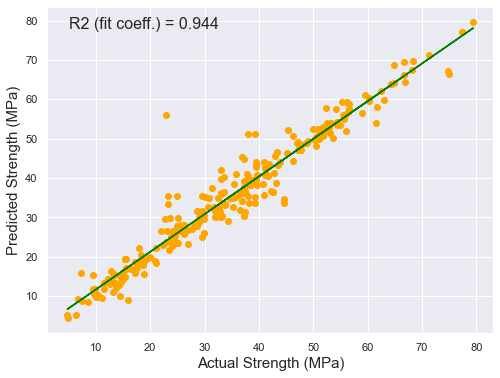

In [185]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(y_test, predicted_unscaled_test, color='orange')

ax.set_xlabel('Actual Strength (MPa)', fontsize=15)
ax.set_ylabel('Predicted Strength (MPa)', fontsize=15)

# #regression line
lin_model = LinearRegression().fit(y_test.values.reshape(-1,1), predicted_unscaled_test)
model_score = lin_model.score(y_test.values.reshape(-1,1), predicted_unscaled_test)

ax.plot(y_test, lin_model.predict(y_test.values.reshape(-1,1)), color='green')

ax.annotate(f'R2 (fit coeff.) = {round(model_score, 3)}', (5, 78), fontsize=16)

plt.grid(True)

plt.savefig("output/final_model_score.png")
plt.show()



### Insights:

 - Strongest features are still age_log and cement, although others changed order vs TreeRegressor model, and less correlatingon the correlation matrix became more important.

In [153]:
resultsDf = pd.DataFrame({'Models':models, 'Best_test_scores': best_scores, 'CV_scores': cv_scores})
resultsDf = round(resultsDf[['Models', 'Best_test_scores', 'CV_scores']], 3)
resultsDf


,Models,Best_test_scores,CV_scores
0,Linear_Regression,0.816,0.804
1,Lasso,0.812,0.797
2,Ridge,0.817,0.804
3,Poly_3,0.877,0.804
4,Random_Forest,0.914,0.916
5,Bagging_Regressor,0.899,0.903
6,DecisionTree_Regressor,0.846,0.861
7,GradientBoosting_Regressor,0.942,0.945


## Conculsions

### Significance of the R2

- Analysed the "Concrete Strength" using Linear Regression, Polynomial model, Decision Tree, Random Forest, Bagging and Boosting Regressors to build a predictive model for the same.

- The model can be used to predict the compressive strength of concrete as a function of input variables, such as age, and its components: cement, superplastic, water, slag, ash and coarse, fine aggregates. The best model revealed strong dependance of the strengh on the concrete age, cement quantity and quantaties of water and super plasticizer additives. The compressive strength is increasing mostly with age and cement quantity, where plasticizing is also important. 

 - Linear Regression, Ridge, Lasso and Polynomial models converged with the cross-validation scores at around 80%, where Tree, Forest based models have better chance for higher scores, and can be tuned with grid or randomized searches. <b>Gradient Boosting Regressor resulted in the highest testing and cross-validation scores.</b>
 

**Higher R2 score are important for the prediction precision. Based on the concrete strength predictions scientist, engineers and other decision makers will commit to a certain material quality and longevity, which is critical for the buildings stability; and will trigger materials development tasks. Poor predictions may have detrimental effect on a business with further compromized customers trust.**


# **Inferences:**

 - Model scores are strongly dependant on choosen Feature Selection and Engineering techniques. It is not easy to handle the non-balanced continious numerical values. Stacking with other variables and converting to categorical significantly improves models performance. 
 
 - During the Feature Engineering it is important to keep independant variables actally independent from each other, while trying to maximize their correlations with the output target variable.
 
 - Data Scientist working on such models better be very familiar with the subject, such as materials components nature and their properties. 
 
 - Recommendations for the higher compressive concrete strength would be higher age, cement quantity and proportional amounts of polymer plasticizer and water, based on the best model feature importances. (Although I would be careful about the age - there must be an optimum, where too old concrete may lose its elasticity (superplasticizer), so that became brittle and weak.)
